In [1]:
# prever gastos com seguro

In [19]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, \
    mean_absolute_error, mean_absolute_percentage_error

In [36]:
PLOT_MEDIUM = (8,8)
sns.set_style('darkgrid')

### 1. Carregue o conjunto de dados em um DataFrame usando a biblioteca pandas.

In [3]:
data = pd.read_csv('./../../../Datasets/insurance.csv')

In [6]:
data.shape

(1338, 7)

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Explore e visualize os dados para entender suas características.

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [33]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Missing values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
# Duplicates, have 1
data.drop_duplicates(keep='first', inplace=True)


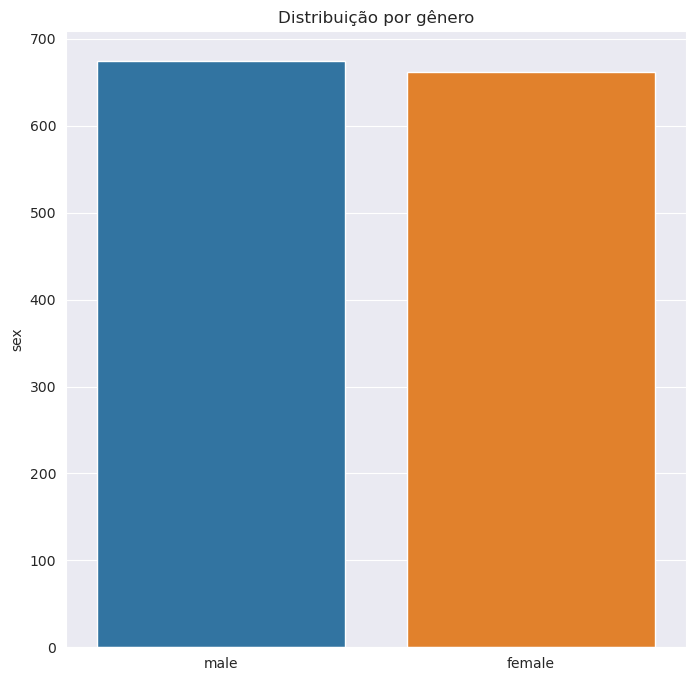

In [37]:

plt.figure(figsize=PLOT_MEDIUM)
sns.barplot(None, x=['male', 'female'], y=data.sex.value_counts())
plt.title('Distribuição por gênero')
plt.show()

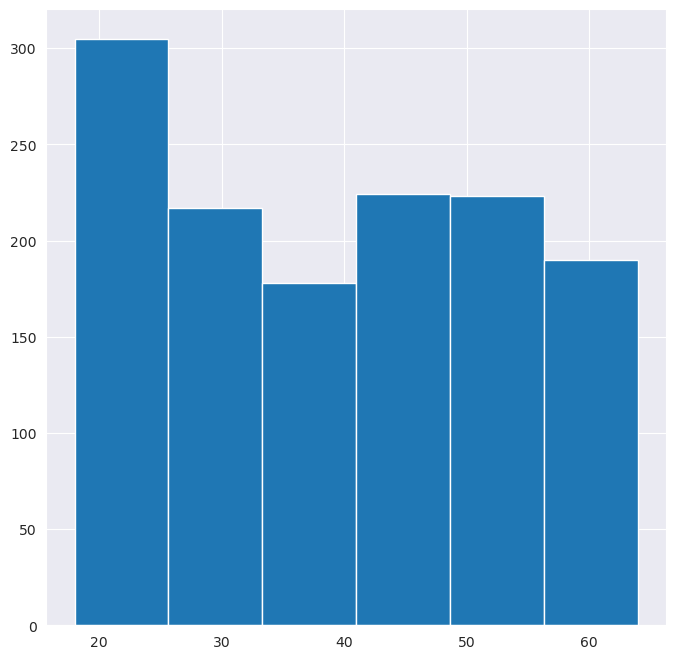

In [38]:
# Distribuição por idade

plt.figure(figsize=PLOT_MEDIUM)
plt.hist(data['age'], bins=6)
plt.show()